In [1]:
!pip install keras-tuner

     |████████████████████████████████| 97 kB 3.4 MB/s 


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [3]:
print(tf.__version__)

2.6.0


In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d alxmamaev/flowers-recognition

 97% 217M/225M [00:01<00:00, 103MB/s]
100% 225M/225M [00:02<00:00, 117MB/s]


In [8]:
! unzip flowers-recognition.zip

Archive:  flowers-recognition.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  i

In [9]:
!pip install -q split-folders

In [10]:
import os
import zipfile
import splitfolders 
import time
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import tensorflow as tf
import keras
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [11]:
pwd

'/content'

In [12]:
!ls "/content/flowers"

daisy  dandelion  rose	sunflower  tulip


In [13]:
!cd "/content/"

In [14]:
pwd

'/content'

In [15]:
# Split the Dataset folders into train test val folders

splitfolders.ratio(input="/content/flowers",output="output", seed=100, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 4317 files [00:01, 3218.59 files/s]


In [16]:
#create paths for folders 

daisy_dir = os.path.join("/content/output/train/daisy")
dandelion_dir = os.path.join("/content/output/train/dandelion")
rose_dir = os.path.join("/content/output/train/rose")
sunflower_dir = os.path.join("/content/output/train/sunflower")
tulip_dir = os.path.join("/content/output/train/tulip")

In [17]:
#count number of files in each directory
print('Total training Daisy images :',len(os.listdir(daisy_dir)))
print('Total training Dandelion images :',len(os.listdir(dandelion_dir)))
print('Total training Rose images :',len(os.listdir(rose_dir)))
print('Total training Sunflower images :',len(os.listdir(sunflower_dir)))
print('Total training Tulip images :',len(os.listdir(tulip_dir)))

Total training Daisy images : 611
Total training Dandelion images : 841
Total training Rose images : 627
Total training Sunflower images : 586
Total training Tulip images : 787


In [18]:
daisy_files = os.listdir(daisy_dir)
dandelion_files = os.listdir(dandelion_dir)
rose_files = os.listdir(rose_dir)
sunflower_files = os.listdir(sunflower_dir)
tulip_files = os.listdir(tulip_dir)

print("Total len of training images",len(daisy_files+dandelion_files+rose_files+sunflower_files+tulip_files))

Total len of training images 3452


In [19]:
#count of images available in test dataset for each category
print('Total Test Daisy images :',len(os.listdir('output/test/daisy')))
print('Total Test Dandelion images :',len(os.listdir('output/test/dandelion')))
print('Total Test Rose images :',len(os.listdir('output/test/rose')))
print('Total Test Sunflower images :',len(os.listdir('output/test/sunflower')))
print('Total Test Tulip images :',len(os.listdir('output/test/tulip')))

Total Test Daisy images : 77
Total Test Dandelion images : 106
Total Test Rose images : 79
Total Test Sunflower images : 74
Total Test Tulip images : 99


In [21]:
#to plot images get complete paths for images
pic_index = 10

#get paths for some of the immages from each folder
daisy_fewimg = [os.path.join(daisy_dir,fname) for fname in daisy_files[pic_index-10:pic_index]]
dandelion_fewimg = [os.path.join(dandelion_dir,fname) for fname in dandelion_files[pic_index-10:pic_index]]
rose_fewimg = [os.path.join(rose_dir,fname) for fname in rose_files[pic_index-10:pic_index]]
sunflower_fewimg = [os.path.join(sunflower_dir,fname) for fname in sunflower_files[pic_index-10:pic_index]]
tulip_fewimg = [os.path.join(tulip_dir,fname) for fname in tulip_files[pic_index-10:pic_index]]


(240, 320, 3)


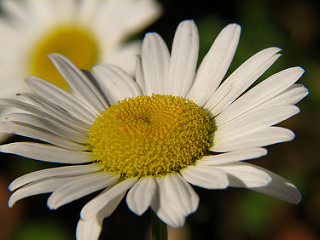

In [23]:
#plot random image 
import PIL.Image as Image
input_shape = cv2.imread(daisy_fewimg[0]).shape
print(input_shape)
Image.open(daisy_fewimg[0])

In [24]:
#image Augumentation using ImageDataGenerator on train data 
#Data augmentation is used to increase the size of training set and to get more different images

training_dir = "/content/output/train"
training_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [25]:
#do not perform augmentation on validation and test data/validation set ,this might mislead the results

validation_dir = "/content/output/val"
validation_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
test_dir = "/content/output/test"
test_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
#flow_from_directory() method allows you to read the images directly from the directory and augment them while the neural network model is learning on the training data.

training_set = training_datagen.flow_from_directory(training_dir,target_size=(240,320),batch_size=32,class_mode='categorical')
validation_set = validation_datagen.flow_from_directory(validation_dir,target_size=(240,320),batch_size=32,class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_dir,target_size=(240,320),batch_size=32,class_mode='categorical')

Found 3452 images belonging to 5 classes.
Found 430 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


In [28]:
import keras_tuner as kt
from tensorflow import keras

In [29]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape= input_shape
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(5, activation='softmax')
  ])
  
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  
  return model

In [30]:
tuner = kt.RandomSearch(build_model,objective='val_loss',max_trials=5)


In [31]:
tuner.search(training_set,epochs=5, validation_data=validation_set)

Trial 3 Complete [00h 11m 14s]
val_loss: 1.0350697040557861

Best val_loss So Far: 1.0350697040557861
Total elapsed time: 00h 42m 15s

Search: Running Trial #4

Hyperparameter    |Value             |Best Value So Far 
conv_1_filter     |96                |32                
conv_1_kernel     |5                 |3                 
conv_2_filter     |48                |32                
conv_2_kernel     |5                 |3                 
dense_1_units     |112               |96                

Epoch 1/5
108/108 [==============================] - 201s 2s/step - loss: 4.9140 - accuracy: 0.2202 - val_loss: 1.6061 - val_accuracy: 0.2442
Epoch 2/5
108/108 [==============================] - 179s 2s/step - loss: 1.6048 - accuracy: 0.2329 - val_loss: 1.6031 - val_accuracy: 0.2442


KeyboardInterrupt: ignored

In [32]:
model=tuner.get_best_models(num_models=1)[0]

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 318, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 236, 316, 32)      9248      
_________________________________________________________________
flatten (Flatten)            (None, 2386432)           0         
_________________________________________________________________
dense (Dense)                (None, 96)                229097568 
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 485       
Total params: 229,108,197
Trainable params: 229,108,197
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model.fit(training_set, epochs=10,validation_data=validation_set,verbose=2)

Epoch 1/10
108/108 - 80s - loss: 0.9128 - accuracy: 0.6550 - val_loss: 1.1176 - val_accuracy: 0.5884
Epoch 2/10
108/108 - 79s - loss: 0.8814 - accuracy: 0.6756 - val_loss: 0.9787 - val_accuracy: 0.6163
Epoch 3/10
108/108 - 79s - loss: 0.8314 - accuracy: 0.6837 - val_loss: 1.0117 - val_accuracy: 0.5977
Epoch 4/10
108/108 - 78s - loss: 0.7863 - accuracy: 0.7042 - val_loss: 1.0044 - val_accuracy: 0.6140
Epoch 5/10
108/108 - 81s - loss: 0.7519 - accuracy: 0.7233 - val_loss: 1.0504 - val_accuracy: 0.6233
Epoch 6/10
108/108 - 80s - loss: 0.7227 - accuracy: 0.7402 - val_loss: 1.0619 - val_accuracy: 0.6070
Epoch 7/10
108/108 - 80s - loss: 0.6732 - accuracy: 0.7546 - val_loss: 1.0661 - val_accuracy: 0.6279
Epoch 8/10
108/108 - 79s - loss: 0.6544 - accuracy: 0.7590 - val_loss: 1.3179 - val_accuracy: 0.5977
Epoch 9/10
108/108 - 81s - loss: 0.6286 - accuracy: 0.7642 - val_loss: 1.2571 - val_accuracy: 0.6023
Epoch 10/10
108/108 - 80s - loss: 0.6155 - accuracy: 0.7790 - val_loss: 1.0715 - val_accura

In [40]:
import pandas as pd


pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.912790,0.654983,1.117626,0.588372
1,0.881436,0.675550,0.978680,0.616279
2,0.831418,0.683662,1.011679,0.597674
3,0.786283,0.704229,1.004437,0.613953
4,0.751850,0.723349,1.050385,0.623256
5,0.722676,0.740151,1.061931,0.606977
6,0.673152,0.754635,1.066060,0.627907
7,0.654394,0.758980,1.317864,0.597674
8,0.628615,0.764195,1.257052,0.602326
9,0.615484,0.778969,1.071493,0.630233


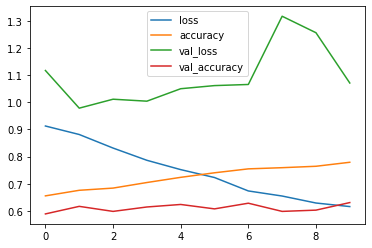

In [41]:
pd.DataFrame(history.history).plot()

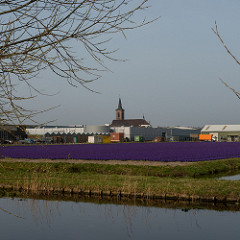

In [44]:
img = "/content/output/test/tulip/13509967925_eaaeefa396_m.jpg"

import PIL.Image as Image
Image.open(img)

In [55]:
Name=[]
for file in os.listdir("/content/flowers"):
    Name+=[file]
print(Name)
print(len(Name))

['rose', 'tulip', 'dandelion', 'sunflower', 'daisy']
5


In [56]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [60]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

image=load_img("/content/output/test/tulip/13509967925_eaaeefa396_m.jpg",target_size=(240,320))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [61]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
#print(prediction)
#print(value)
print("Prediction is {}.".format(move_name))

Prediction is tulip.
